# HR Analytics Case Study - Attrition Prediction - Models

## Table of Contents

- 1.0 - Problem Overview
- 1.1 - Importing Datasets
- 2.0 - Correlation Matrix
    - 2.1 - HR Clean - Original Variables
        - 2.1.1 - Full Correlation Matrix
        - 2.1.2 - Correlation to Attrition
    - 2.2 - HR Grouped Variables
        - 2.2.1 - Full Correlation Matrix
        - 2.2.2 - Correlation to Attrition
- 3.0 - Model Building - HR Clean - Original Variables
    - 3.1 - Train/Test Split
    - 3.2 - Baseline Models 
    - 3.3 - Handling Class Imbalance
    - 3.4 - Feature Selection
    - 3.5 - Evaluating All Results from HR Clean Models
- 4.0 - Model Building - HR Grouped Dataset
    - 4.1 - Train/Test Split
    - 4.2 - Baseline Models Grouped
    - 4.3 - Handling Class Imbalance Grouped
    - 4.4 - Feature Selection
    - 4.5 - Evaluating All Results from HR Grouped Models
- 5.0 - Evaluating Best Overall Models from both datasets



## 1.0 - Problem Overview

In the previous notebook, we uploaded multiple datasets and performed exploratory data analysis (EDA) as well as data cleaning. At the end of that notebook, I exported two different cleaned datasets. The first dataset contains the original variables, while the second includes grouped binary variables. In this notebook, we will build machine learning models to predict employee attrition. Additionally, we will compare the performance of the models using the original features versus the grouped features to determine which provides better results.

## 1.1 - Importing Datasets

In [29]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [30]:
# HR Clean Dataset
hr_clean = pd.read_csv('hr_clean.csv')

# HR Clean Grouped Dataset
hr_grouped = pd.read_csv('hr_clean_grouped.csv')


In [31]:
hr_clean.head()

,Age,Attrition,DistanceFromHome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,...,JobInvolvement_Very High,PerformanceRating_Excellent,PerformanceRating_Outstanding,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,Gender_Female,Gender_Male
0,51,0,6,1.0,11,0,1.0,6,1,0,...,0,1,0,1,0,0,0,0,1,0
1,31,1,10,0.0,23,1,6.0,3,5,1,...,0,0,1,1,0,0,0,0,1,0
2,32,0,17,1.0,15,3,5.0,2,5,0,...,0,1,0,0,0,0,1,0,0,1
3,38,0,2,3.0,11,3,13.0,5,8,7,...,0,1,0,0,0,1,0,0,0,1
4,32,0,10,4.0,12,2,9.0,2,6,0,...,0,1,0,1,0,0,0,0,0,1


In [32]:
hr_grouped.head()

,Attrition,DistanceFromHome,StockOptionLevel,TrainingTimesLastYear,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,...,YearsWithCurrManagerGrouped_0-2,YearsWithCurrManagerGrouped_2-6,YearsWithCurrManagerGrouped_7+,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,Gender_Female,Gender_Male
0,0,6,0,6,0,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,1,10,1,3,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2,0,17,3,2,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
3,0,2,3,5,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,0,10,2,2,0,0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,1


In [33]:
print("The shape of the HR clean dataset is:", hr_clean.shape)
print("The shape of the HR grouped dataset is:", hr_grouped.shape)

The shape of the HR clean dataset is: (4300, 51)
The shape of the HR grouped dataset is: (4300, 71)


## 2.0 - Correlation Matrix

### 2.1 - HR Clean - Original Variables

##### 2.1.1 - Full Correlation Matrix

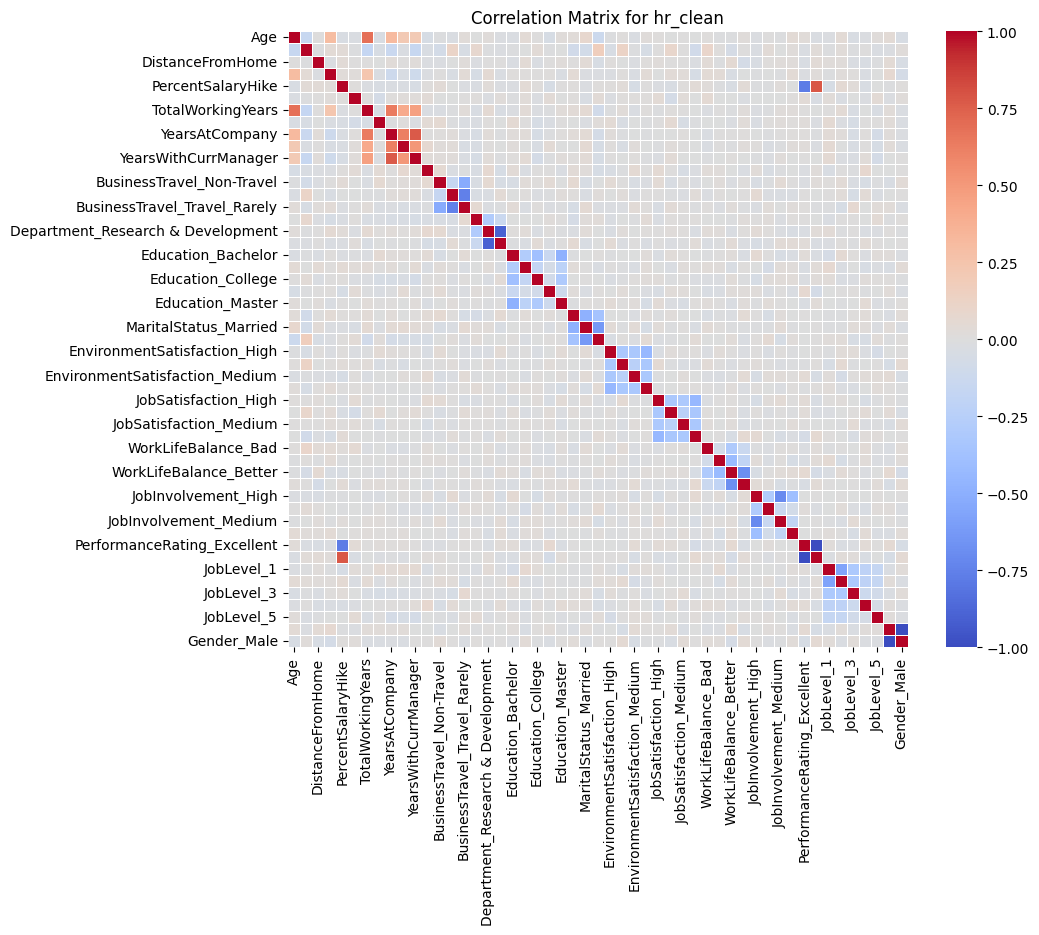

In [34]:
# Compute the correlation matrix
correlation_matrix = hr_clean.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix for hr_clean")
plt.show()

##### 2.1.2 - Correlation to Attrition

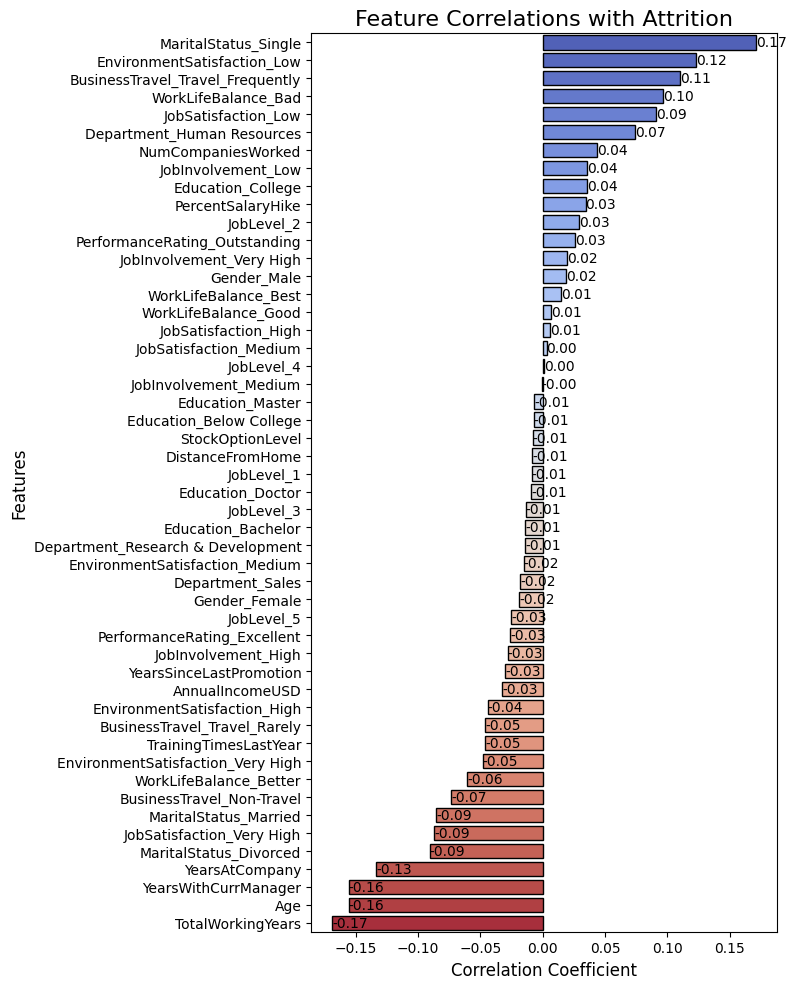

In [35]:
# Calculate the correlation of each feature with Attrition
correlations_original = hr_clean.corr()['Attrition'].drop('Attrition').sort_values(ascending=False)

# Create a DataFrame for better labeling
correlation_df_original = correlations_original.reset_index()
correlation_df_original.columns = ['Feature', 'Correlation']

# Plot the correlations as a vertical bar chart
plt.figure(figsize=(8, 10))
sns.barplot(
    data=correlation_df_original,
    y='Feature',  
    x='Correlation',  
    palette='coolwarm',
    edgecolor='black'
)

# Annotate each bar with the correlation value
for index, row in correlation_df_original.iterrows():
    plt.text(
        row['Correlation'],  
        index,               
        f"{row['Correlation']:.2f}",  
        color='black',
        va='center'
    )

# Add labels and title
plt.title('Feature Correlations with Attrition', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()


### 2.2 - HR Grouped Variables

##### 2.2.1 - Full Correlation Matrix

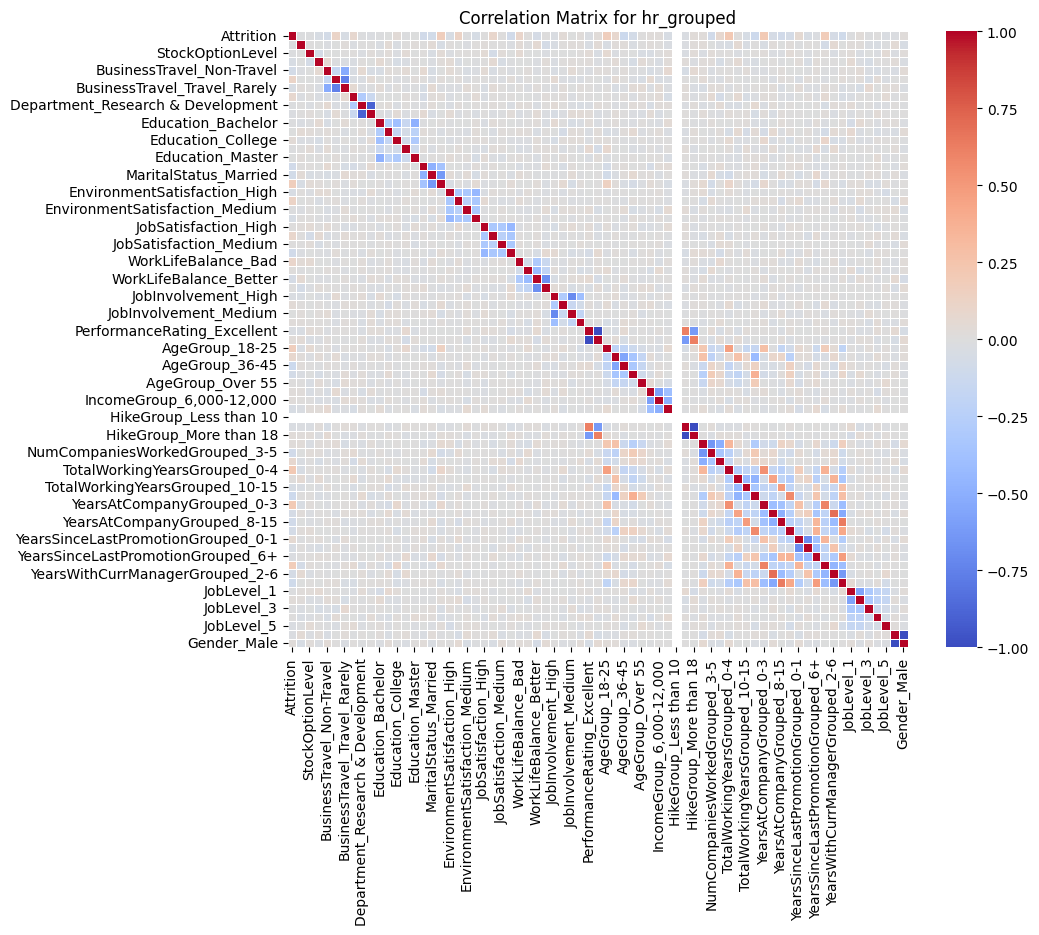

In [36]:
# Compute the correlation matrix
correlation_matrix_grouped = hr_grouped.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_grouped, annot=False, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix for hr_grouped")
plt.show()

##### 2.2.2 - Correlation to Attrition

posx and posy should be finite values
posx and posy should be finite values


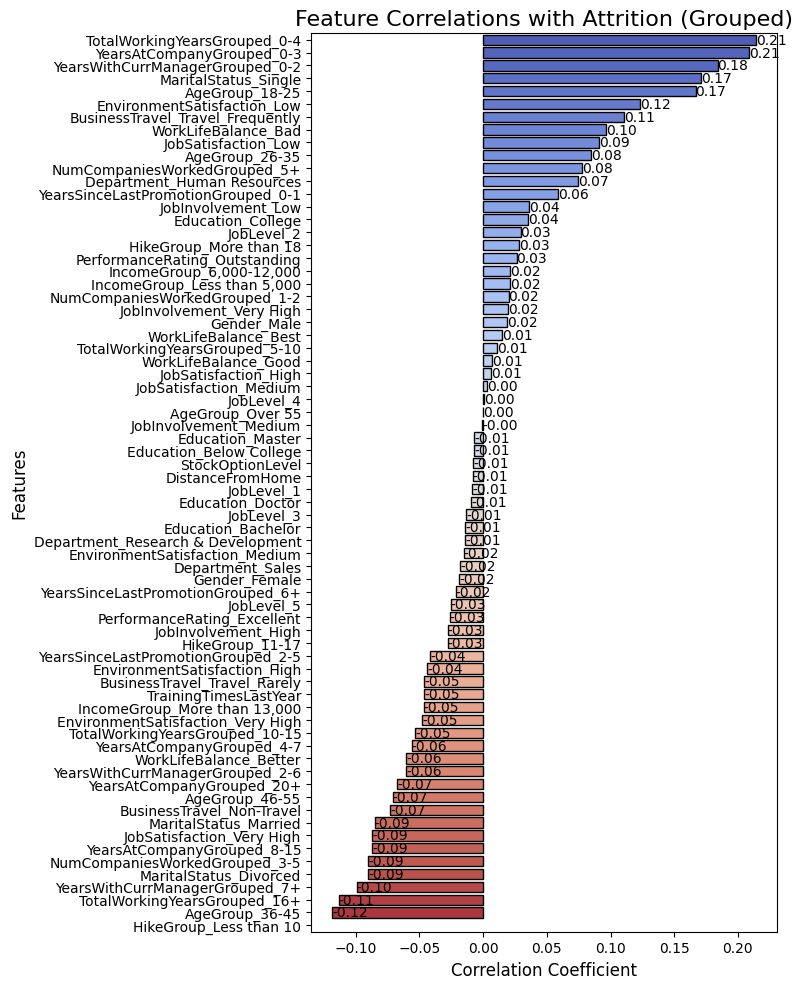

In [69]:
warnings.filterwarnings("ignore", message="posx and posy should be finite values")

# Calculate the correlation of each feature with Attrition
correlations_grouped = hr_grouped.corr()['Attrition'].drop('Attrition').sort_values(ascending=False)

# Create a DataFrame for better labeling
correlation_df_grouped = correlations_grouped.reset_index()
correlation_df_grouped.columns = ['Feature', 'Correlation']

# Plot the correlations as a vertical bar chart
plt.figure(figsize=(8, 10))
sns.barplot(
    data=correlation_df_grouped,
    y='Feature',  
    x='Correlation',  
    palette='coolwarm',
    edgecolor='black'
)

# Annotate each bar with the correlation value
for index, row in correlation_df_grouped.iterrows():
    plt.text(
        row['Correlation'],  
        index,               
        f"{row['Correlation']:.2f}",  
        color='black',
        va='center'
    )

# Add labels and title
plt.title('Feature Correlations with Attrition (Grouped)', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()


## 3.0 - Model Building - HR Clean - Original Variables

### 3.1 - Train/Test Split

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = hr_clean.drop(columns=['Attrition']) 
y = hr_clean['Attrition']  # Target column

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print(f"X_train shape: {X_train_scaled.shape}")
print(f"X_test shape: {X_test_scaled.shape}")
print(f"y_train distribution:\n{y_train.value_counts(normalize=True).round(2)}")
print(f"y_test distribution:\n{y_test.value_counts(normalize=True).round(2)}")


X_train shape: (3440, 50)
X_test shape: (860, 50)
y_train distribution:
Attrition
0    0.84
1    0.16
Name: proportion, dtype: float64
y_test distribution:
Attrition
0    0.84
1    0.16
Name: proportion, dtype: float64


In the above, we split our data into train and test groups (80/20) and printed the distribution of our target variable 'Attrition'. As seen here and in our EDA, the variable is imbalanced. We will handle this after setting some baseline models. 

### 3.2 - Baseline Models

In [39]:
# Define classifiers with hyperparameters
classifiers = [
    LogisticRegression(C=0.1, n_jobs=-1),
    KNeighborsClassifier(10, n_jobs=-1),
    SVC(gamma='scale', C=1),
    DecisionTreeClassifier(max_depth=10, min_samples_leaf=10),
    RandomForestClassifier(max_depth=3, n_estimators=50, 
                           max_features=5, min_samples_leaf=10, n_jobs=-1),
    MLPClassifier(hidden_layer_sizes=(100, 100), alpha=0.2, 
                  max_iter=200, learning_rate_init=0.01, learning_rate='adaptive',
                  early_stopping=True, validation_fraction=0.2),
    AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                       n_estimators=50, learning_rate=0.1),
    BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                     n_estimators=50, max_features=5, n_jobs=-1),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(reg_param=0.1)
]

In [40]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
warnings.filterwarnings("ignore", category=FutureWarning)

# Metrics to collect
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Initialize dictionary to store results
results = {}

# Perform cross-validation for training metrics and evaluation on test data
for clf in classifiers:
    # Cross-validation scores for training
    cv_accuracy = cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()

    # Fit classifier to get the test scores
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)

    # Calculate test metrics (accuracy, precision, recall, and F1 score)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred)

    # Store results in the dictionary
    results[clf.__class__.__name__] = {
        'Train Accuracy': cv_accuracy,
        'Test Accuracy': test_accuracy,
        'Test Precision': test_precision,
        'Test Recall': test_recall,
        'Test F1 Score': test_f1
    }

# Create DataFrame from the results and round the values
results_df = pd.DataFrame(results).T
results_df = results_df.round(2)

results_df


,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1 Score
LogisticRegression,0.85,0.85,0.66,0.19,0.30
KNeighborsClassifier,0.84,0.83,0.26,0.04,0.06
SVC,0.90,0.92,0.95,0.54,0.69
DecisionTreeClassifier,0.86,0.88,0.72,0.43,0.54
RandomForestClassifier,0.84,0.84,0.00,0.00,0.00
MLPClassifier,0.86,0.97,0.96,0.86,0.91
AdaBoostClassifier,0.88,0.89,0.90,0.33,0.48
BaggingClassifier,0.84,0.84,0.00,0.00,0.00
GaussianNB,0.78,0.79,0.39,0.50,0.44
QuadraticDiscriminantAnalysis,0.83,0.84,0.51,0.55,0.53


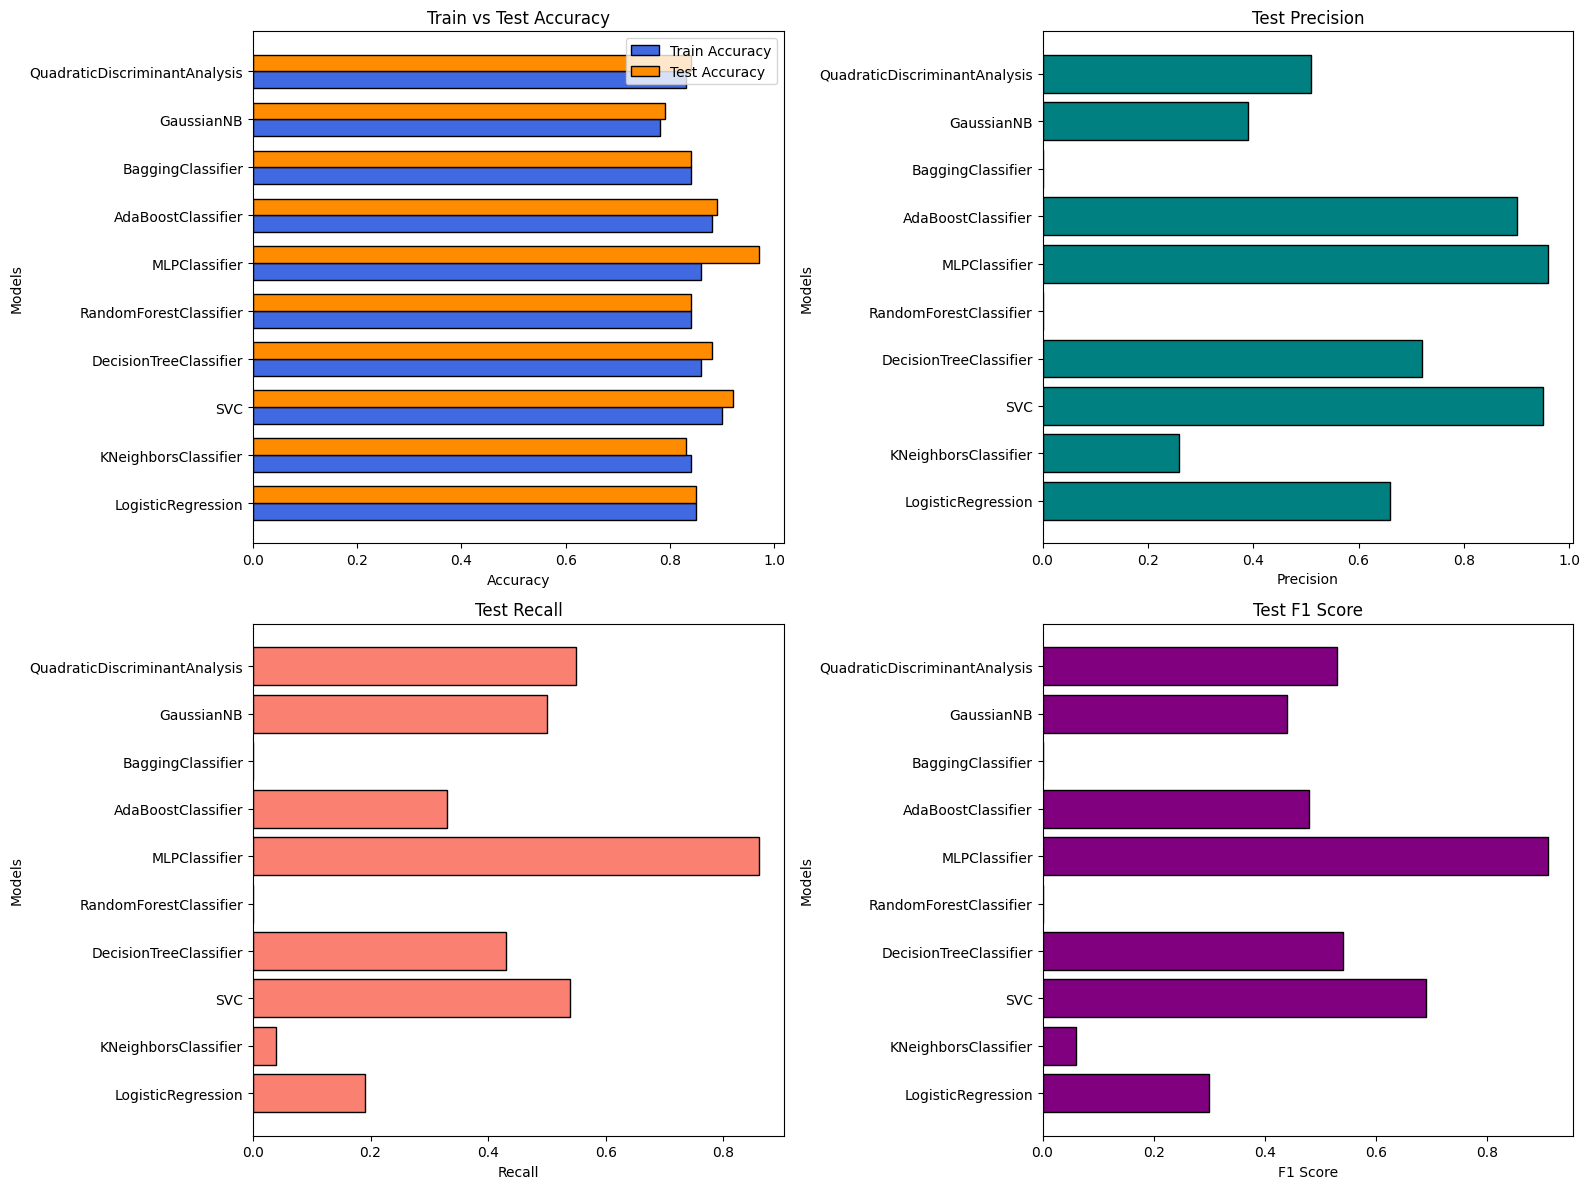

In [41]:
# Plotting the results
plt.figure(figsize=(16, 12))

# Train vs Test Accuracy
plt.subplot(2, 2, 1)
bar_width = 0.35
index = range(len(results_df))
plt.barh(index, results_df['Train Accuracy'], bar_width, label='Train Accuracy', color='royalblue', edgecolor='black')
plt.barh([i + bar_width for i in index], results_df['Test Accuracy'], bar_width, label='Test Accuracy', color='darkorange', edgecolor='black')
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Train vs Test Accuracy')
plt.yticks([i + bar_width / 2 for i in index], results_df.index)
plt.legend()

# Test Precision
plt.subplot(2, 2, 2)
plt.barh(index, results_df['Test Precision'], color='teal', edgecolor='black')
plt.xlabel('Precision')
plt.ylabel('Models')
plt.title('Test Precision')
plt.yticks([i for i in index], results_df.index)

# Test Recall
plt.subplot(2, 2, 3)
plt.barh(index, results_df['Test Recall'], color='salmon', edgecolor='black')
plt.xlabel('Recall')
plt.ylabel('Models')
plt.title('Test Recall')
plt.yticks([i for i in index], results_df.index)

# Test F1 Score
plt.subplot(2, 2, 4)
plt.barh(index, results_df['Test F1 Score'], color='purple', edgecolor='black')
plt.xlabel('F1 Score')
plt.ylabel('Models')
plt.title('Test F1 Score')
plt.yticks([i for i in index], results_df.index)

# Show Plot
plt.tight_layout()
plt.show()


We can quickly see that two of our models, BaggingClassifier and RandomForestClassifier are not picking up values from our positive class (ie. identifying attrition). We see it still has pretty good accuracy due to our imbalanced dataset and predicting every value as negative. This is the reason the accuracy for both these models is 84%, as seen by the 84% imbalanced dataset. In the next step, we will handle class imbalance and see how our models perform. 

Additionally, our more complex models gave us interesting results, with some, such as the MLPClassifier, showing extremely high test accuracy and F1 scores, potentially indicating overfitting on the training data given the dataset's limited size. Additionally, the unusually higher test accuracy compared to training accuracy in certain models suggests potential over-optimization or data leakage, which is not typical and warrants further investigation.

### 3.3 - Handling Class Imabalance

In [42]:
from imblearn.over_sampling import SMOTE

# Handle Class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Initialize dictionary to store results
smote_results = {}

In [43]:
# Re-Running Models with SMOTE results

for clf in classifiers:
    # Cross-validation scores for training
    cv_accuracy = cross_val_score(clf, X_train_smote, y_train_smote, cv=5, scoring='accuracy').mean()

    # Fit classifier to get the test scores
    clf.fit(X_train_smote, y_train_smote)
    y_pred = clf.predict(X_test_scaled)

    # Calculate test metrics (accuracy, precision, recall, and F1 score)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred)

    # Store results in the dictionary
    smote_results[clf.__class__.__name__] = {
        'Train Accuracy': cv_accuracy,
        'Test Accuracy': test_accuracy,
        'Test Precision': test_precision,
        'Test Recall': test_recall,
        'Test F1 Score': test_f1
    }

# Create DataFrame from the results and round the values
smote_results_df = pd.DataFrame(smote_results).T
smote_results_df = smote_results_df.round(2)

smote_results_df

,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1 Score
LogisticRegression,0.72,0.73,0.34,0.68,0.45
KNeighborsClassifier,0.84,0.77,0.40,0.90,0.56
SVC,0.98,0.97,0.88,0.94,0.91
DecisionTreeClassifier,0.86,0.84,0.51,0.63,0.57
RandomForestClassifier,0.77,0.78,0.36,0.53,0.43
MLPClassifier,0.98,0.99,0.96,0.96,0.96
AdaBoostClassifier,0.88,0.86,0.58,0.54,0.56
BaggingClassifier,0.81,0.84,0.49,0.40,0.44
GaussianNB,0.69,0.65,0.26,0.65,0.38
QuadraticDiscriminantAnalysis,0.84,0.79,0.41,0.68,0.51


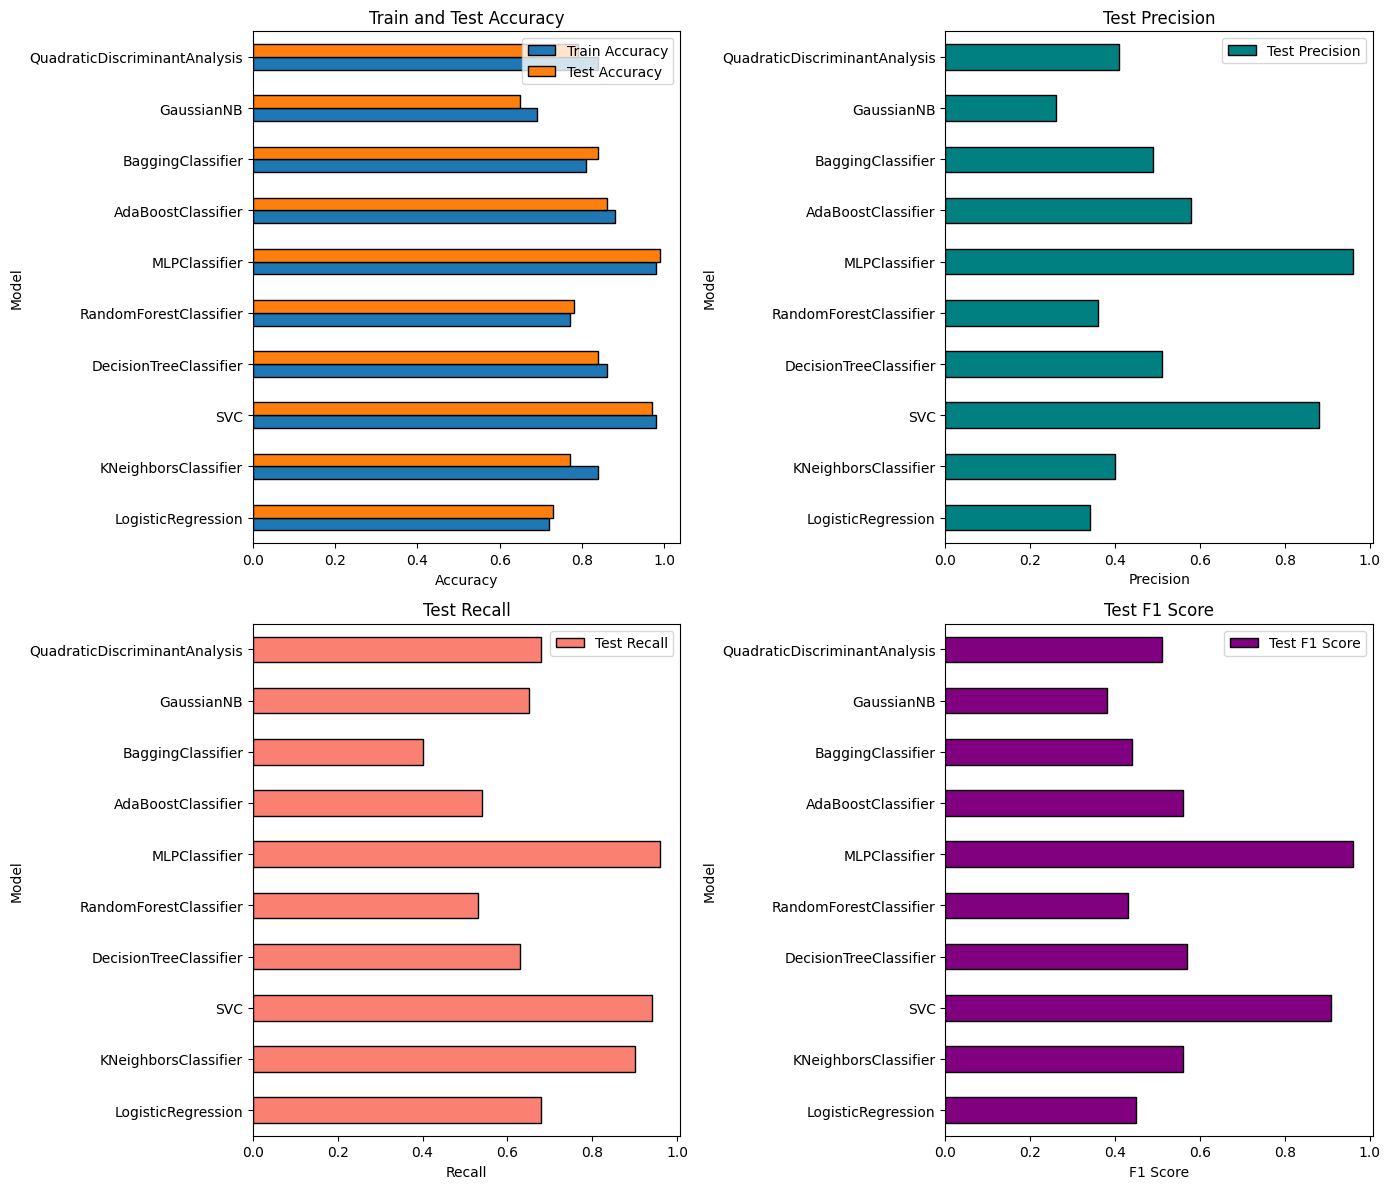

In [44]:
# Plotting the smote results
smote_results_plot = smote_results_df[[
    'Train Accuracy', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score'
]]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Train and Test Accuracy
smote_results_plot[['Train Accuracy', 'Test Accuracy']].plot(kind='barh', ax=axs[0, 0], edgecolor='black')
axs[0, 0].set_title('Train and Test Accuracy')
axs[0, 0].set_xlabel('Accuracy')
axs[0, 0].set_ylabel('Model')

# Test Precision
smote_results_plot[['Test Precision']].plot(kind='barh', ax=axs[0, 1], color='teal', edgecolor='black')
axs[0, 1].set_title('Test Precision')
axs[0, 1].set_xlabel('Precision')
axs[0, 1].set_ylabel('Model')

# Test Recall
smote_results_plot[['Test Recall']].plot(kind='barh', ax=axs[1, 0], color='salmon', edgecolor='black')
axs[1, 0].set_title('Test Recall')
axs[1, 0].set_xlabel('Recall')
axs[1, 0].set_ylabel('Model')

# Test F1 Score
smote_results_plot[['Test F1 Score']].plot(kind='barh', ax=axs[1, 1], color='purple', edgecolor='black')
axs[1, 1].set_title('Test F1 Score')
axs[1, 1].set_xlabel('F1 Score')
axs[1, 1].set_ylabel('Model')

# Show plot
plt.tight_layout()
plt.show()

As seen above, addressing the class imbalance significantly improved our results. All categories now show strong metrics, and the two models that previously struggled to identify positive attrition are now effectively capturing it. Additionally, several of our models, such as the SVC and MLPClassifier, are performing exceptionally well, with test F1 scores and accuracy.

However, as seen before, this raises potential concerns about model complexity. These models may be overly complex for the given dataset, potentially memorizing specific patterns rather than generalizing effectively, as suggested by the unusually high performance metrics. This highlights a possible bias-variance trade-off, where the models may have overfit the data. While the results look great initially, careful evaluation is needed to ensure the models can generalize well to unseen data.

### 3.4 - Feature Selection

##### 3.4.1 - Random Forest Classifier and top 20 most important features

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model on the SMOTE data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to view feature importances
importance_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.head(20)


,Feature,Importance
7,YearsAtCompany,0.067577
5,TotalWorkingYears,0.064028
0,Age,0.059512
9,YearsWithCurrManager,0.056825
10,AnnualIncomeUSD,0.052104
24,MaritalStatus_Single,0.046402
1,DistanceFromHome,0.042754
3,PercentSalaryHike,0.041066
2,NumCompaniesWorked,0.039104
8,YearsSinceLastPromotion,0.035952


##### 3.4.2 - Checking for Multicollinearity among selected features

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
warnings.filterwarnings("ignore", message="divide by zero encountered in scalar divide")

# Select the top features (based on importance) for VIF calculation
top_features = importance_df['Feature'].head(20).values

# Create a new DataFrame with only the top features from X_train_smote
X_top_smote = X_train_smote[top_features]

# Add a constant to the DataFrame (for VIF calculation)
X_top_smote_const = add_constant(X_top_smote)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_top_smote_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_top_smote_const.values, i) for i in range(X_top_smote_const.shape[1])]

# Display VIF values
print(vif_data)


                              Feature       VIF
0                               const  1.117361
1                      YearsAtCompany  4.427345
2                   TotalWorkingYears  3.465614
3                                 Age  2.075845
4                YearsWithCurrManager  2.712316
5                     AnnualIncomeUSD  1.022467
6                MaritalStatus_Single       inf
7                    DistanceFromHome  1.018817
8                   PercentSalaryHike  1.024074
9                  NumCompaniesWorked  1.283517
10            YearsSinceLastPromotion  1.748199
11              TrainingTimesLastYear  1.020827
12        EnvironmentSatisfaction_Low  1.165419
13          JobSatisfaction_Very High  1.157601
14                JobSatisfaction_Low  1.167365
15                   StockOptionLevel  1.023414
16             MaritalStatus_Divorced       inf
17              MaritalStatus_Married       inf
18  EnvironmentSatisfaction_Very High  1.151057
19             WorkLifeBalance_Better  1

In the above, we printed the VIF values for our top 20 most important features. Values between 1-5 indicate moderate multicollinearity while anything between 5-10 indicate high multicollinearity. Inf values indicates perfect correlation as seen on the MaritalStatus variables. The rest of our variables are under 5 so we will drop MaritalStatus_Divorced and MaritalStatus_Married, and then re-run our models. 

In [47]:
# Remove the collinear MaritalStatus columns
top_features_cleaned = [feature for feature in top_features if 'MaritalStatus_Divorced' not in feature and 'MaritalStatus_Married' not in feature]

# Create a new DataFrame with only the cleaned top features from X_train_smote
X_top_smote_cleaned = X_train_smote[top_features_cleaned]

# Add constant to the cleaned DataFrame (for VIF calculation)
X_top_smote_cleaned_const = add_constant(X_top_smote_cleaned)

# Calculate VIF for each feature
vif_data_cleaned = pd.DataFrame()
vif_data_cleaned['Feature'] = X_top_smote_cleaned_const.columns
vif_data_cleaned['VIF'] = [variance_inflation_factor(X_top_smote_cleaned_const.values, i) for i in range(X_top_smote_cleaned_const.shape[1])]

# Display VIF values after cleaning the top features
print(vif_data_cleaned)

                              Feature       VIF
0                               const  1.114060
1                      YearsAtCompany  4.427090
2                   TotalWorkingYears  3.463466
3                                 Age  2.075233
4                YearsWithCurrManager  2.710853
5                     AnnualIncomeUSD  1.018184
6                MaritalStatus_Single  1.057627
7                    DistanceFromHome  1.018168
8                   PercentSalaryHike  1.024005
9                  NumCompaniesWorked  1.281774
10            YearsSinceLastPromotion  1.746048
11              TrainingTimesLastYear  1.020657
12        EnvironmentSatisfaction_Low  1.165257
13          JobSatisfaction_Very High  1.156063
14                JobSatisfaction_Low  1.167333
15                   StockOptionLevel  1.023143
16  EnvironmentSatisfaction_Very High  1.151054
17             WorkLifeBalance_Better  1.014391
18   BusinessTravel_Travel_Frequently  1.020442


##### 3.4.3 - Running Models with Selected Features

In [48]:
# Re-Running Models with the cleaned SMOTE data
smote_results_cleaned = {}

for clf in classifiers:
    # Cross-validation scores for training
    cv_accuracy = cross_val_score(clf, X_top_smote_cleaned, y_train_smote, cv=5, scoring='accuracy').mean()

    # Fit classifier to get the test scores
    clf.fit(X_top_smote_cleaned, y_train_smote)
    y_pred = clf.predict(X_test_scaled[top_features_cleaned]) 

    # Calculate test metrics (accuracy, precision, recall, and F1 score)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred)

    # Store results in the dictionary
    smote_results_cleaned[clf.__class__.__name__] = {
        'Train Accuracy': cv_accuracy,
        'Test Accuracy': test_accuracy,
        'Test Precision': test_precision,
        'Test Recall': test_recall,
        'Test F1 Score': test_f1
    }

# Create DataFrame from the results and round the values
smote_results_cleaned_df = pd.DataFrame(smote_results_cleaned).T
smote_results_cleaned_df = smote_results_cleaned_df.round(2)

smote_results_cleaned_df


,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1 Score
LogisticRegression,0.70,0.72,0.33,0.67,0.44
KNeighborsClassifier,0.86,0.80,0.44,0.88,0.58
SVC,0.93,0.87,0.58,0.81,0.67
DecisionTreeClassifier,0.85,0.85,0.53,0.65,0.58
RandomForestClassifier,0.75,0.78,0.38,0.54,0.45
MLPClassifier,0.98,0.97,0.91,0.90,0.90
AdaBoostClassifier,0.87,0.87,0.63,0.46,0.53
BaggingClassifier,0.78,0.78,0.36,0.48,0.41
GaussianNB,0.68,0.62,0.26,0.71,0.38
QuadraticDiscriminantAnalysis,0.76,0.70,0.30,0.68,0.42


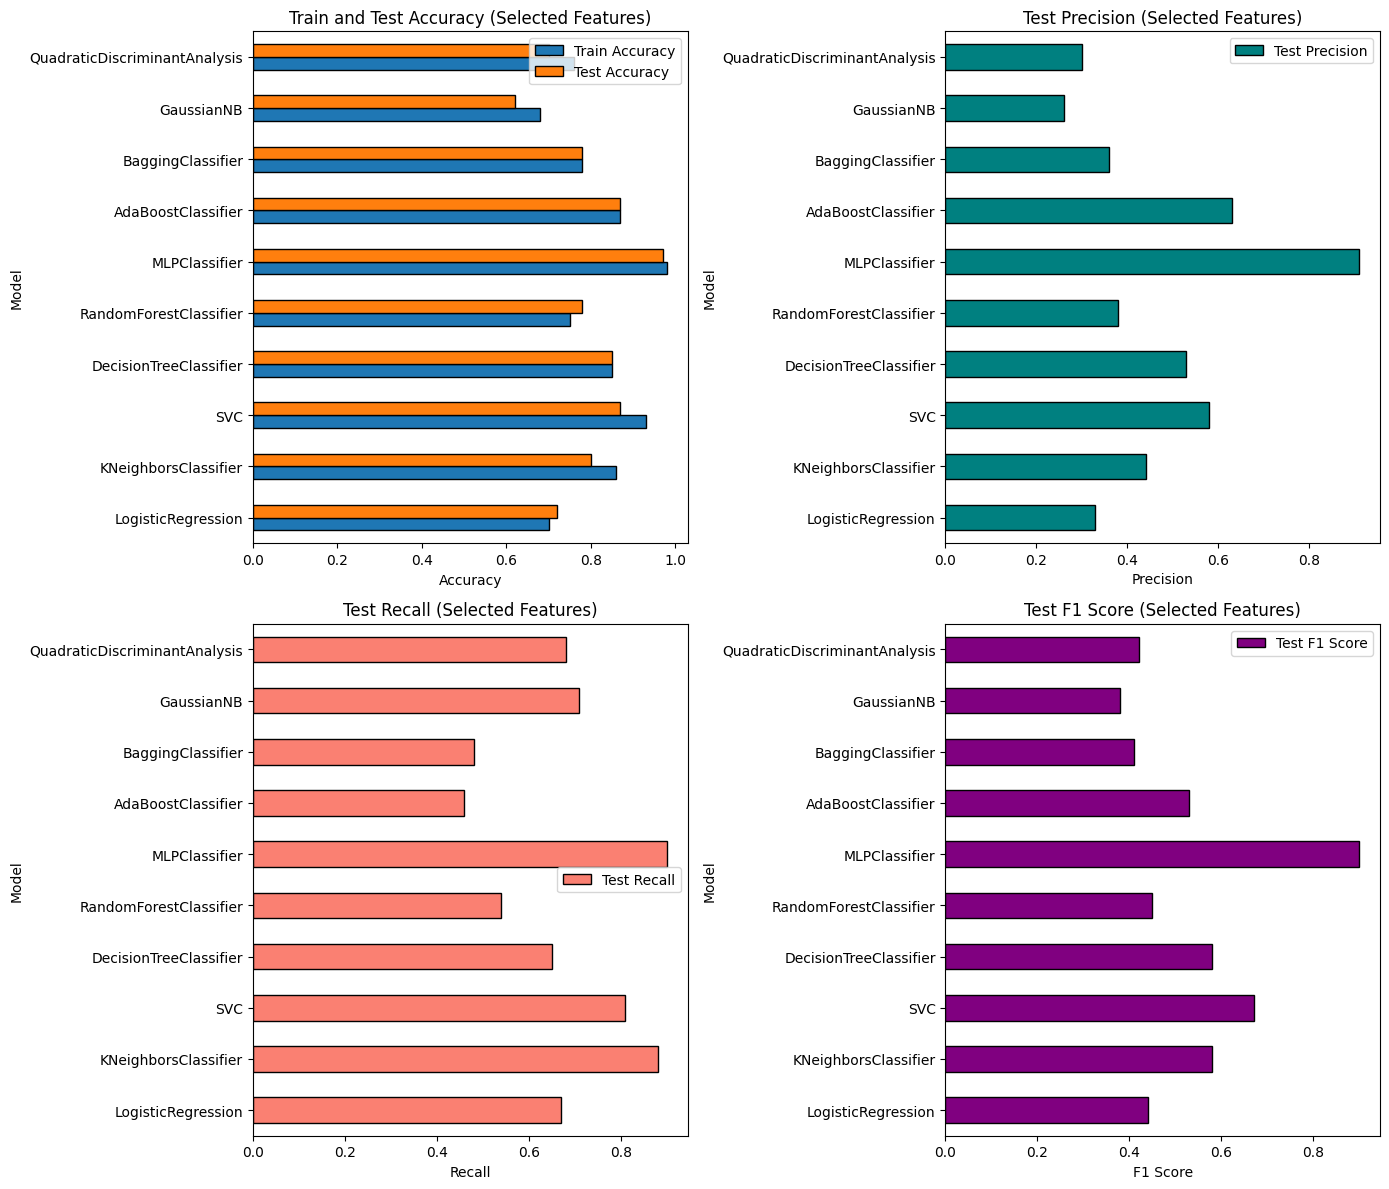

In [49]:
# Plotting the cleaned SMOTE results
smote_results_cleaned_plot = smote_results_cleaned_df[[
    'Train Accuracy', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score'
]]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Train and Test Accuracy
smote_results_cleaned_plot[['Train Accuracy', 'Test Accuracy']].plot(kind='barh', ax=axs[0, 0], edgecolor='black')
axs[0, 0].set_title('Train and Test Accuracy (Selected Features)')
axs[0, 0].set_xlabel('Accuracy')
axs[0, 0].set_ylabel('Model')

# Test Precision
smote_results_cleaned_plot[['Test Precision']].plot(kind='barh', ax=axs[0, 1], color='teal', edgecolor='black')
axs[0, 1].set_title('Test Precision (Selected Features)')
axs[0, 1].set_xlabel('Precision')
axs[0, 1].set_ylabel('Model')

# Test Recall
smote_results_cleaned_plot[['Test Recall']].plot(kind='barh', ax=axs[1, 0], color='salmon', edgecolor='black')
axs[1, 0].set_title('Test Recall (Selected Features)')
axs[1, 0].set_xlabel('Recall')
axs[1, 0].set_ylabel('Model')

# Test F1 Score
smote_results_cleaned_plot[['Test F1 Score']].plot(kind='barh', ax=axs[1, 1], color='purple', edgecolor='black')
axs[1, 1].set_title('Test F1 Score (Selected Features)')
axs[1, 1].set_xlabel('F1 Score')
axs[1, 1].set_ylabel('Model')

# Show plot
plt.tight_layout()
plt.show()


Feature selection resulted in more balanced performance, with reduced overfitting and better generalization. The SVC performed well, achieving a test F1 score of 0.67 and test accuracy of 87%. However, models like the MLPClassifier still exhibit extremely high performance, suggesting some potential overfitting.

### 3.5 - Evaluating All Results from HR Clean Models

In [50]:
# Add a "Model Type" column to each DataFrame
results_df['Model Type'] = 'Baseline'
smote_results_df['Model Type'] = 'SMOTE'
smote_results_cleaned_df['Model Type'] = 'SMOTE Selected Features'

# Add a "Model Name" column to uniquely identify the classifier
results_df['Model Name'] = results_df.index + " (Baseline)"
smote_results_df['Model Name'] = smote_results_df.index + " (SMOTE)"
smote_results_cleaned_df['Model Name'] = smote_results_cleaned_df.index + " (SMOTE Selected Features)"


In [51]:
# Combine only SMOTE and SMOTE Cleaned Features results into a single DataFrame
smote_combined_results_df = pd.concat([smote_results_df, smote_results_cleaned_df], axis=0)

# Reorder columns for readability
smote_combined_results_df = smote_combined_results_df[[
    'Model Name', 'Model Type', 'Train Accuracy', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score'
]].reset_index(drop=True)

# Sort the results by Test F1 Score in descending order
top_10_smote_results = smote_combined_results_df.sort_values(by='Test F1 Score', ascending=False).head(10)

# Display the top 10 models
top_10_smote_results


,Model Name,Model Type,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1 Score
5,MLPClassifier (SMOTE),SMOTE,0.98,0.99,0.96,0.96,0.96
2,SVC (SMOTE),SMOTE,0.98,0.97,0.88,0.94,0.91
15,MLPClassifier (SMOTE Selected Features),SMOTE Selected Features,0.98,0.97,0.91,0.90,0.90
12,SVC (SMOTE Selected Features),SMOTE Selected Features,0.93,0.87,0.58,0.81,0.67
13,DecisionTreeClassifier (SMOTE Selected Features),SMOTE Selected Features,0.85,0.85,0.53,0.65,0.58
11,KNeighborsClassifier (SMOTE Selected Features),SMOTE Selected Features,0.86,0.80,0.44,0.88,0.58
3,DecisionTreeClassifier (SMOTE),SMOTE,0.86,0.84,0.51,0.63,0.57
6,AdaBoostClassifier (SMOTE),SMOTE,0.88,0.86,0.58,0.54,0.56
1,KNeighborsClassifier (SMOTE),SMOTE,0.84,0.77,0.40,0.90,0.56
16,AdaBoostClassifier (SMOTE Selected Features),SMOTE Selected Features,0.87,0.87,0.63,0.46,0.53


With SMOTE and cleaned features, we saw noticeable improvements across all models, with some of the more complex ones still performing a bit too well. While models like the MLPClassifier and SVC showed impressive results, they may still be overfitting to the data. However, we also saw some strong and more realistic outcomes, particularly from other models like SVC (Cleaned), KNeighbors and DecisionTree, which balanced precision and recall effectively. Overall, these adjustments helped us achieve more reliable and realistic results. 

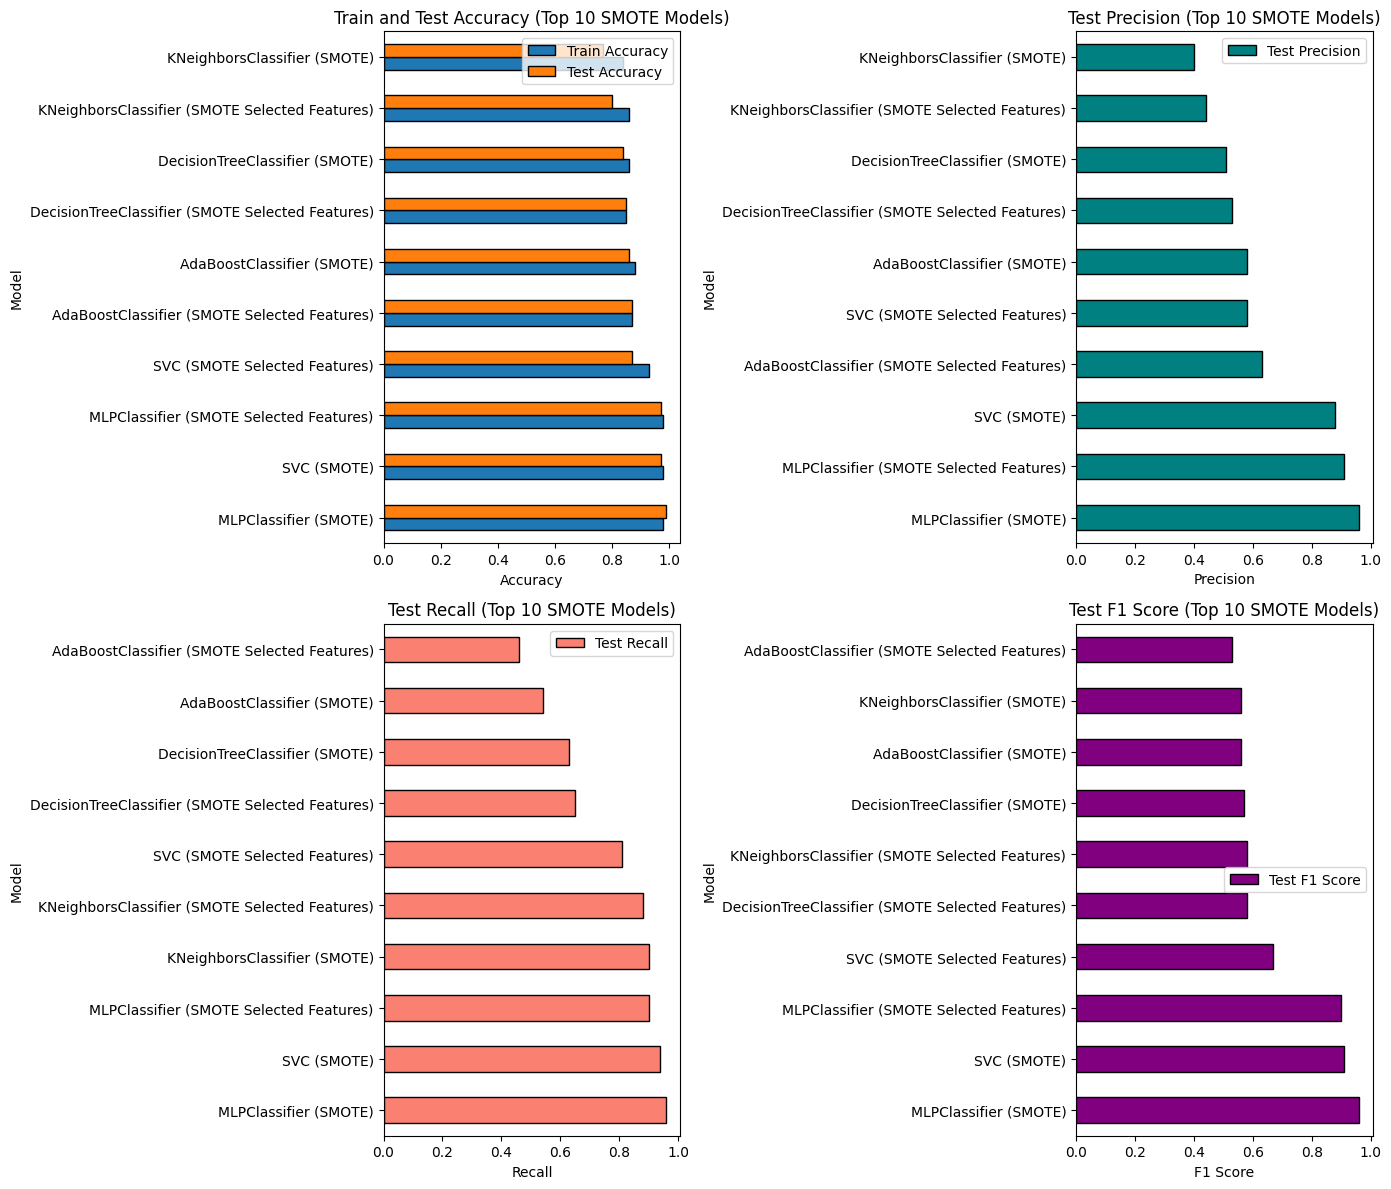

In [52]:
# Set the Model Name as the index for plotting
top_10_smote_results_plot = top_10_smote_results[['Model Name', 'Train Accuracy', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score']]
top_10_smote_results_plot.set_index('Model Name', inplace=True)

# Sort the data by the specific performance metric in descending order for each plot
top_10_smote_results_plot_sorted_accuracy = top_10_smote_results_plot[['Train Accuracy', 'Test Accuracy']].sort_values(by='Test Accuracy', ascending=False)
top_10_smote_results_plot_sorted_precision = top_10_smote_results_plot[['Test Precision']].sort_values(by='Test Precision', ascending=False)
top_10_smote_results_plot_sorted_recall = top_10_smote_results_plot[['Test Recall']].sort_values(by='Test Recall', ascending=False)
top_10_smote_results_plot_sorted_f1 = top_10_smote_results_plot[['Test F1 Score']].sort_values(by='Test F1 Score', ascending=False)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Train and Test Accuracy
top_10_smote_results_plot_sorted_accuracy.plot(kind='barh', ax=axs[0, 0], edgecolor='black')
axs[0, 0].set_title('Train and Test Accuracy (Top 10 SMOTE Models)')
axs[0, 0].set_xlabel('Accuracy')
axs[0, 0].set_ylabel('Model')

# Test Precision
top_10_smote_results_plot_sorted_precision.plot(kind='barh', ax=axs[0, 1], color='teal', edgecolor='black')
axs[0, 1].set_title('Test Precision (Top 10 SMOTE Models)')
axs[0, 1].set_xlabel('Precision')
axs[0, 1].set_ylabel('Model')

# Test Recall
top_10_smote_results_plot_sorted_recall.plot(kind='barh', ax=axs[1, 0], color='salmon', edgecolor='black')
axs[1, 0].set_title('Test Recall (Top 10 SMOTE Models)')
axs[1, 0].set_xlabel('Recall')
axs[1, 0].set_ylabel('Model')

# Test F1 Score
top_10_smote_results_plot_sorted_f1.plot(kind='barh', ax=axs[1, 1], color='purple', edgecolor='black')
axs[1, 1].set_title('Test F1 Score (Top 10 SMOTE Models)')
axs[1, 1].set_xlabel('F1 Score')
axs[1, 1].set_ylabel('Model')

# Show plot
plt.tight_layout()
plt.show()


## 4.0 - Model Building - HR Grouped Dataset

### 4.1 - Train/Test Split

In [53]:
# Define features 
X_grouped = hr_grouped.drop(columns=['Attrition']) 
y_grouped = hr_grouped['Attrition']  

# Perform train-test split
X_train_grouped, X_test_grouped, y_train_grouped, y_test_grouped = train_test_split(
    X_grouped, y_grouped, test_size=0.2, random_state=42, stratify=y_grouped
)

# Standardize the features
scaler_grouped = StandardScaler()
X_train_grouped_scaled = scaler_grouped.fit_transform(X_train_grouped)
X_test_grouped_scaled = scaler_grouped.transform(X_test_grouped)

X_train_grouped_scaled = pd.DataFrame(X_train_grouped_scaled, columns=X_train_grouped.columns, index=X_train_grouped.index)
X_test_grouped_scaled = pd.DataFrame(X_test_grouped_scaled, columns=X_test_grouped.columns, index=X_test_grouped.index)

print(f"X_train_grouped shape: {X_train_grouped_scaled.shape}")
print(f"X_test_grouped shape: {X_test_grouped_scaled.shape}")
print(f"y_train_grouped distribution:\n{y_train_grouped.value_counts(normalize=True).round(2)}")
print(f"y_test_grouped distribution:\n{y_test_grouped.value_counts(normalize=True).round(2)}")


X_train_grouped shape: (3440, 70)
X_test_grouped shape: (860, 70)
y_train_grouped distribution:
Attrition
0    0.84
1    0.16
Name: proportion, dtype: float64
y_test_grouped distribution:
Attrition
0    0.84
1    0.16
Name: proportion, dtype: float64


### 4.2 - Baseline Models - Grouped

In [54]:
# Define classifiers with hyperparameters
classifiers_grouped = [
    LogisticRegression(C=0.1, n_jobs=-1),
    KNeighborsClassifier(10, n_jobs=-1),
    SVC(kernel="linear", C=0.1),
    SVC(gamma='scale', C=1),
    DecisionTreeClassifier(max_depth=10, min_samples_leaf=10),
    RandomForestClassifier(max_depth=3, n_estimators=50, 
                           max_features=5, min_samples_leaf=10, n_jobs=-1),
    MLPClassifier(hidden_layer_sizes=(100, 100), alpha=0.2, 
                  max_iter=200, learning_rate_init=0.01, learning_rate='adaptive',
                  early_stopping=True, validation_fraction=0.2),
    AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                       n_estimators=50, learning_rate=0.1),
    BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                     n_estimators=50, max_features=5, n_jobs=-1),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(reg_param=0.1)
]

In [55]:
# Initialize dictionary to store results
results_grouped = {}

# Perform cross-validation for training metrics and evaluation on test data
for clf in classifiers_grouped:
    cv_accuracy = cross_val_score(clf, X_train_grouped_scaled, y_train_grouped, cv=5, scoring='accuracy').mean()

    # Fit classifier to get the test scores
    clf.fit(X_train_grouped_scaled, y_train_grouped)
    y_pred_grouped = clf.predict(X_test_grouped_scaled)

    # Calculate test metrics (accuracy, precision, recall, and F1 score)
    test_accuracy = accuracy_score(y_test_grouped, y_pred_grouped)
    test_precision = precision_score(y_test_grouped, y_pred_grouped)
    test_recall = recall_score(y_test_grouped, y_pred_grouped)
    test_f1 = f1_score(y_test_grouped, y_pred_grouped)

    # Store results in the dictionary
    results_grouped[clf.__class__.__name__] = {
        'Train Accuracy': cv_accuracy,
        'Test Accuracy': test_accuracy,
        'Test Precision': test_precision,
        'Test Recall': test_recall,
        'Test F1 Score': test_f1
    }

# Create DataFrame from the results and round the values
results_grouped_df = pd.DataFrame(results_grouped).T
results_grouped_df = results_grouped_df.round(2)

results_grouped_df

,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1 Score
LogisticRegression,0.86,0.87,0.78,0.25,0.38
KNeighborsClassifier,0.84,0.85,0.68,0.15,0.25
SVC,0.92,0.94,0.97,0.63,0.76
DecisionTreeClassifier,0.85,0.87,0.66,0.42,0.52
RandomForestClassifier,0.84,0.84,0.00,0.00,0.00
MLPClassifier,0.88,0.98,0.98,0.92,0.95
AdaBoostClassifier,0.87,0.87,0.88,0.22,0.35
BaggingClassifier,0.84,0.84,0.00,0.00,0.00
GaussianNB,0.76,0.79,0.39,0.55,0.46
QuadraticDiscriminantAnalysis,0.86,0.86,0.57,0.63,0.60


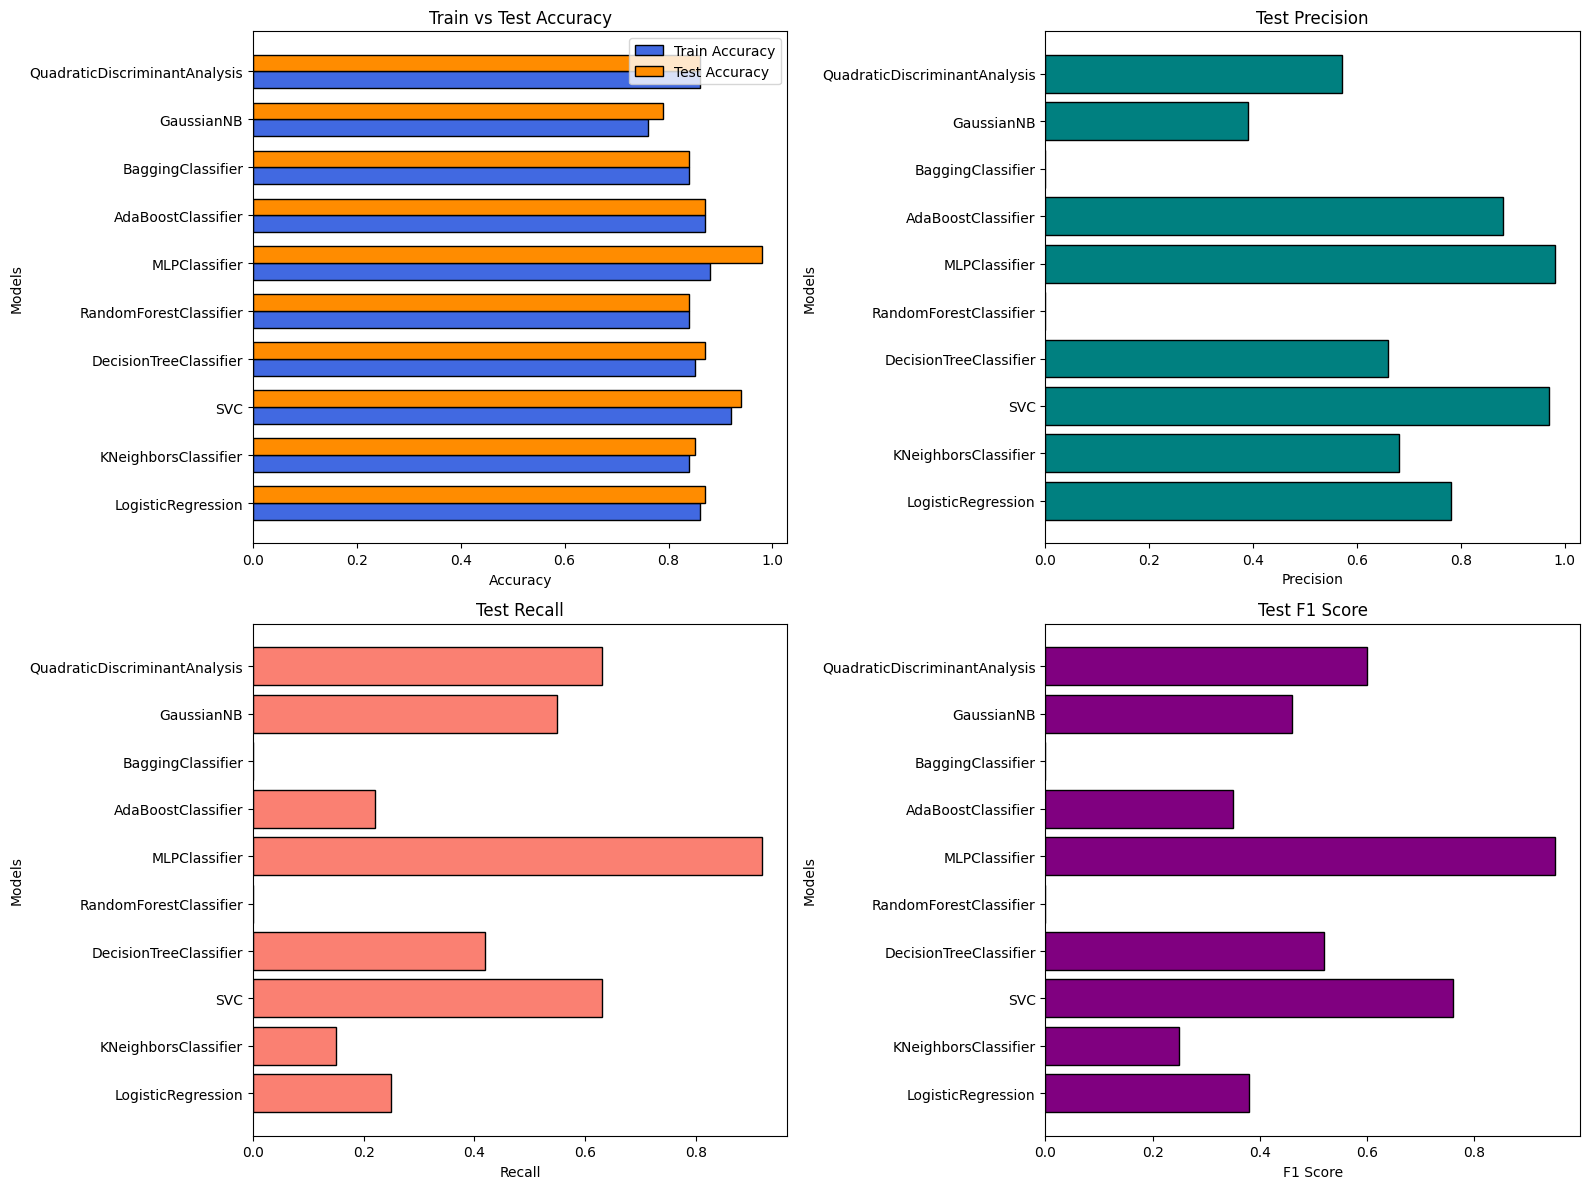

In [56]:
# Plotting the results for the grouped dataset
plt.figure(figsize=(16, 12))

# Train vs Test Accuracy
plt.subplot(2, 2, 1)
bar_width = 0.35
index = range(len(results_grouped_df))
plt.barh(index, results_grouped_df['Train Accuracy'], bar_width, label='Train Accuracy', color='royalblue', edgecolor='black')
plt.barh([i + bar_width for i in index], results_grouped_df['Test Accuracy'], bar_width, label='Test Accuracy', color='darkorange', edgecolor='black')
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Train vs Test Accuracy')
plt.yticks([i + bar_width / 2 for i in index], results_grouped_df.index)
plt.legend()

# Test Precision
plt.subplot(2, 2, 2)
plt.barh(index, results_grouped_df['Test Precision'], color='teal', edgecolor='black')
plt.xlabel('Precision')
plt.ylabel('Models')
plt.title('Test Precision')
plt.yticks([i for i in index], results_grouped_df.index)

# Test Recall
plt.subplot(2, 2, 3)
plt.barh(index, results_grouped_df['Test Recall'], color='salmon', edgecolor='black')
plt.xlabel('Recall')
plt.ylabel('Models')
plt.title('Test Recall')
plt.yticks([i for i in index], results_grouped_df.index)

# Test F1 Score
plt.subplot(2, 2, 4)
plt.barh(index, results_grouped_df['Test F1 Score'], color='purple', edgecolor='black')
plt.xlabel('F1 Score')
plt.ylabel('Models')
plt.title('Test F1 Score')
plt.yticks([i for i in index], results_grouped_df.index)

plt.tight_layout()
plt.show()


The baseline models from the grouped dataset showed poor results similar to the original dataset. Many models struggled with low recall and inconsistent performance across metrics. Again, test accuracy was sometimes higher than training accuracy. Models like RandomForest and BaggingClassifier failed entirely to capture attrition, showing 0 precision and recall. Meanwhile, more complex models like MLPClassifier achieved very high accuracy and F1 scores, but their results seemed overly optimistic.

### 4.3 - Handling Class Imbalance - Grouped

In [57]:
# Handle class imbalance using SMOTE for grouped dataset
smote_grouped = SMOTE(random_state=42)
X_train_grouped_smote, y_train_grouped_smote = smote_grouped.fit_resample(X_train_grouped_scaled, y_train_grouped)

# Initialize dictionary to store results
smote_results_grouped = {}

In [58]:
# Re-running models with SMOTE results for the grouped dataset
for clf in classifiers_grouped:
    cv_accuracy_grouped = cross_val_score(clf, X_train_grouped_smote, y_train_grouped_smote, cv=5, scoring='accuracy').mean()

    # Fit classifier to get the test scores
    clf.fit(X_train_grouped_smote, y_train_grouped_smote)
    y_pred_grouped = clf.predict(X_test_grouped_scaled)

    # Calculate test metrics (accuracy, precision, recall, and F1 score)
    test_accuracy_grouped = accuracy_score(y_test_grouped, y_pred_grouped)
    test_precision_grouped = precision_score(y_test_grouped, y_pred_grouped)
    test_recall_grouped = recall_score(y_test_grouped, y_pred_grouped)
    test_f1_grouped = f1_score(y_test_grouped, y_pred_grouped)

    # Store results in the dictionary
    smote_results_grouped[clf.__class__.__name__] = {
        'Train Accuracy': cv_accuracy_grouped,
        'Test Accuracy': test_accuracy_grouped,
        'Test Precision': test_precision_grouped,
        'Test Recall': test_recall_grouped,
        'Test F1 Score': test_f1_grouped
    }

# Create DataFrame from the results and round the values
smote_results_grouped_df = pd.DataFrame(smote_results_grouped).T
smote_results_grouped_df = smote_results_grouped_df.round(2)

smote_results_grouped_df


,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1 Score
LogisticRegression,0.73,0.74,0.35,0.68,0.46
KNeighborsClassifier,0.84,0.75,0.39,0.97,0.56
SVC,0.99,0.98,0.95,0.94,0.94
DecisionTreeClassifier,0.87,0.86,0.56,0.59,0.57
RandomForestClassifier,0.78,0.80,0.41,0.59,0.48
MLPClassifier,0.99,0.98,0.91,0.98,0.94
AdaBoostClassifier,0.87,0.87,0.61,0.48,0.54
BaggingClassifier,0.82,0.87,0.68,0.35,0.46
GaussianNB,0.69,0.70,0.29,0.60,0.39
QuadraticDiscriminantAnalysis,0.87,0.85,0.52,0.69,0.59


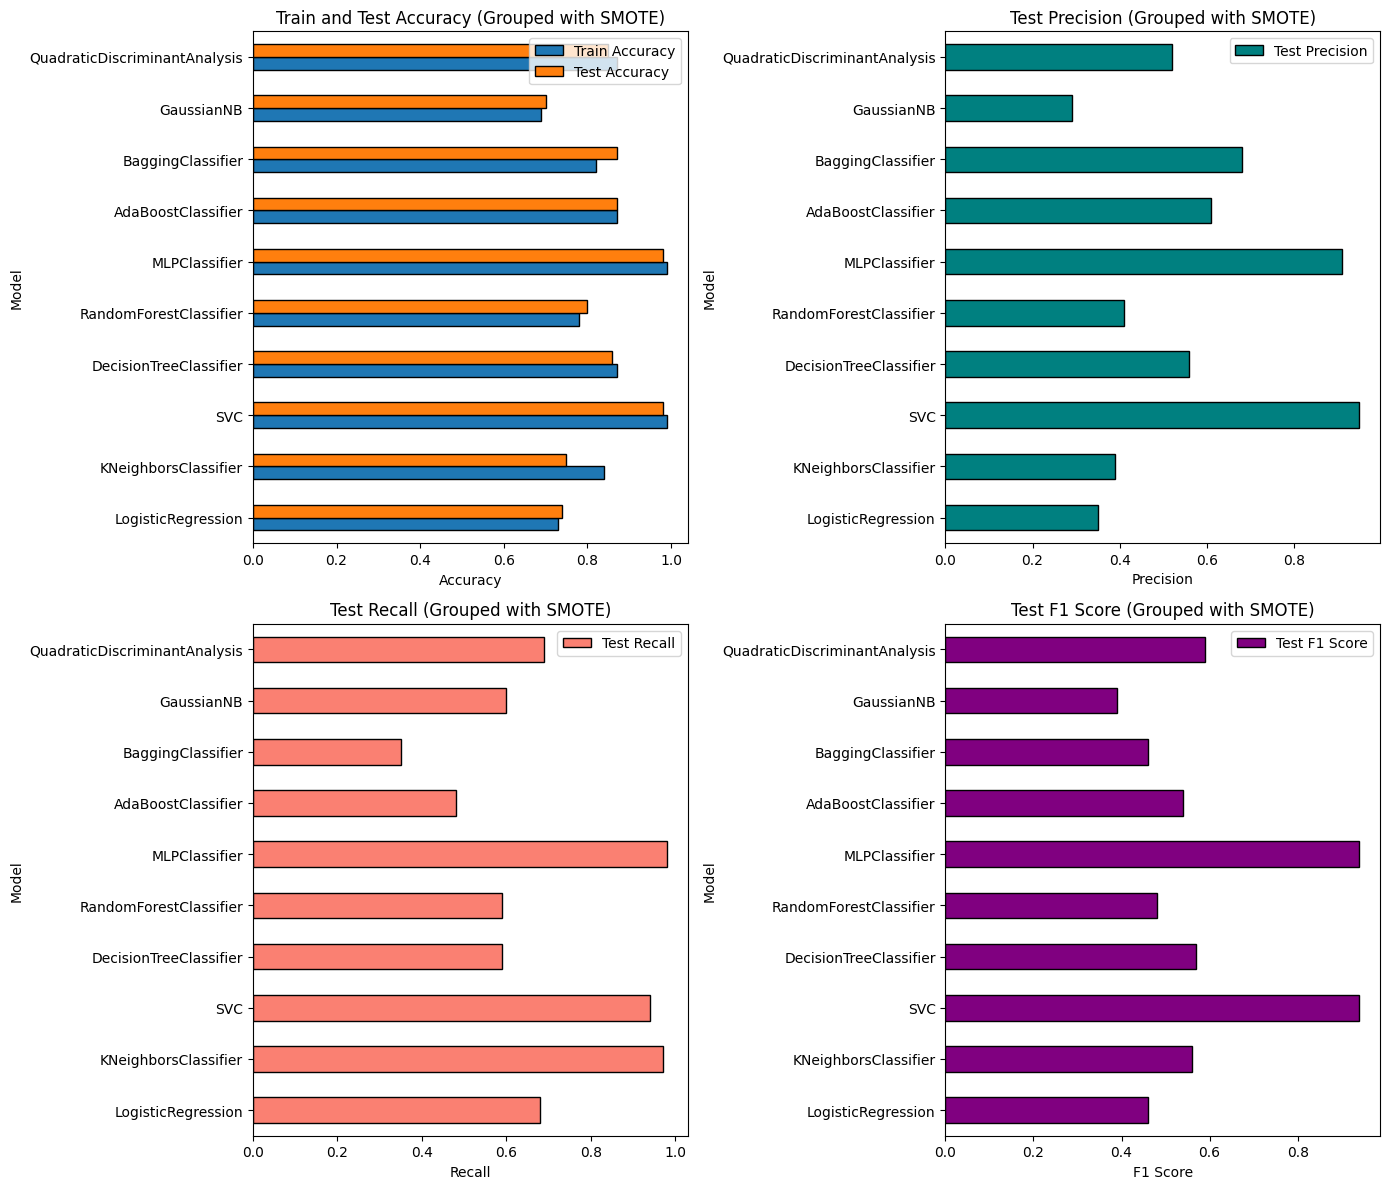

In [59]:
# Plotting the SMOTE results for the grouped dataset
smote_results_grouped_plot = smote_results_grouped_df[[
    'Train Accuracy', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score'
]]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Train and Test Accuracy
smote_results_grouped_plot[['Train Accuracy', 'Test Accuracy']].plot(
    kind='barh', ax=axs[0, 0], edgecolor='black'
)
axs[0, 0].set_title('Train and Test Accuracy (Grouped with SMOTE)')
axs[0, 0].set_xlabel('Accuracy')
axs[0, 0].set_ylabel('Model')

# Test Precision
smote_results_grouped_plot[['Test Precision']].plot(
    kind='barh', ax=axs[0, 1], color='teal', edgecolor='black'
)
axs[0, 1].set_title('Test Precision (Grouped with SMOTE)')
axs[0, 1].set_xlabel('Precision')
axs[0, 1].set_ylabel('Model')

# Test Recall
smote_results_grouped_plot[['Test Recall']].plot(
    kind='barh', ax=axs[1, 0], color='salmon', edgecolor='black'
)
axs[1, 0].set_title('Test Recall (Grouped with SMOTE)')
axs[1, 0].set_xlabel('Recall')
axs[1, 0].set_ylabel('Model')

# Test F1 Score
smote_results_grouped_plot[['Test F1 Score']].plot(
    kind='barh', ax=axs[1, 1], color='purple', edgecolor='black'
)
axs[1, 1].set_title('Test F1 Score (Grouped with SMOTE)')
axs[1, 1].set_xlabel('F1 Score')
axs[1, 1].set_ylabel('Model')

# Show plot
plt.tight_layout()
plt.show()

Similar to our other dataset, handling class imbalance led to a dramatic improvement in performance. However, we still saw a few models producing results that are likely too good, which may indicate overfitting.

### 4.4 - Feature Selection Grouped

##### 4.4.1 - Random Forest Classifier Grouped - Top 20 Variables

In [60]:
# Train a Random Forest model on the SMOTE data using the grouped dataset
rf_model_grouped = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_grouped.fit(X_train_grouped_smote, y_train_grouped_smote) 

# Get feature importances
feature_importances_grouped = rf_model_grouped.feature_importances_

# Create a DataFrame to view feature importances
importance_df_grouped = pd.DataFrame({
    'Feature': X_train_grouped_smote.columns, 
    'Importance': feature_importances_grouped
})

# Sort the DataFrame by importance
importance_df_grouped = importance_df_grouped.sort_values(by='Importance', ascending=False)
importance_df_grouped.head(20)

,Feature,Importance
16,MaritalStatus_Single,0.062146
0,DistanceFromHome,0.043289
2,TrainingTimesLastYear,0.032704
53,YearsAtCompanyGrouped_0-3,0.031413
15,MaritalStatus_Married,0.028966
60,YearsWithCurrManagerGrouped_0-2,0.027000
37,AgeGroup_36-45,0.025964
1,StockOptionLevel,0.025903
22,JobSatisfaction_Low,0.024445
36,AgeGroup_26-35,0.024087


##### 4.4.2- Checking for Multicollinearity

In [61]:
# Select the top features for VIF calculation
top_features_grouped = importance_df_grouped['Feature'].head(20).values

# Create a new DataFrame with only the top features
X_top_grouped_smote = X_train_grouped_smote[top_features_grouped]

# Add a constant to the DataFrame (for VIF calculation)
X_top_grouped_smote_const = add_constant(X_top_grouped_smote)

# Calculate VIF for each feature
vif_data_grouped = pd.DataFrame()
vif_data_grouped['Feature'] = X_top_grouped_smote_const.columns
vif_data_grouped['VIF'] = [variance_inflation_factor(X_top_grouped_smote_const.values, i) for i in range(X_top_grouped_smote_const.shape[1])]

# Display VIF values
print(vif_data_grouped)

                              Feature       VIF
0                               const  1.111525
1                MaritalStatus_Single       inf
2                    DistanceFromHome  1.045805
3               TrainingTimesLastYear  1.034287
4           YearsAtCompanyGrouped_0-3  2.500248
5               MaritalStatus_Married       inf
6     YearsWithCurrManagerGrouped_0-2  1.935359
7                      AgeGroup_36-45  1.559861
8                    StockOptionLevel  1.021785
9                 JobSatisfaction_Low  1.806365
10                     AgeGroup_26-35  1.480821
11          JobSatisfaction_Very High  1.822446
12        EnvironmentSatisfaction_Low  1.168055
13  EnvironmentSatisfaction_Very High  1.154431
14             MaritalStatus_Divorced       inf
15                         JobLevel_2  1.022797
16       NumCompaniesWorkedGrouped_5+  1.159687
17       TotalWorkingYearsGrouped_0-4  1.933341
18   BusinessTravel_Travel_Frequently  1.030126
19               JobSatisfaction_High  1

In [62]:
# Remove the collinear MaritalStatus columns from the grouped dataset
top_features_grouped_cleaned = [feature for feature in top_features_grouped if 'MaritalStatus_Divorced' not in feature and 'MaritalStatus_Married' not in feature]

# Create a new DataFrame with only the cleaned top features from X_train_grouped_smote
X_top_grouped_smote_cleaned = X_train_grouped_smote[top_features_grouped_cleaned]

# Add constant to the cleaned DataFrame (for VIF calculation)
X_top_grouped_smote_cleaned_const = add_constant(X_top_grouped_smote_cleaned)

# Calculate VIF for each feature
vif_data_grouped_cleaned = pd.DataFrame()
vif_data_grouped_cleaned['Feature'] = X_top_grouped_smote_cleaned_const.columns
vif_data_grouped_cleaned['VIF'] = [variance_inflation_factor(X_top_grouped_smote_cleaned_const.values, i) for i in range(X_top_grouped_smote_cleaned_const.shape[1])]

# Display VIF values after cleaning the top features
print(vif_data_grouped_cleaned)

                              Feature       VIF
0                               const  1.108043
1                MaritalStatus_Single  1.056206
2                    DistanceFromHome  1.045638
3               TrainingTimesLastYear  1.033946
4           YearsAtCompanyGrouped_0-3  2.498985
5     YearsWithCurrManagerGrouped_0-2  1.935349
6                      AgeGroup_36-45  1.554387
7                    StockOptionLevel  1.021779
8                 JobSatisfaction_Low  1.804999
9                      AgeGroup_26-35  1.478638
10          JobSatisfaction_Very High  1.822437
11        EnvironmentSatisfaction_Low  1.166898
12  EnvironmentSatisfaction_Very High  1.153945
13                         JobLevel_2  1.022493
14       NumCompaniesWorkedGrouped_5+  1.153445
15       TotalWorkingYearsGrouped_0-4  1.929003
16   BusinessTravel_Travel_Frequently  1.025544
17               JobSatisfaction_High  1.877864
18           IncomeGroup_6,000-12,000  1.027729


##### 4.4.3 - Running Models with Selected Features

In [63]:
# Re-Running Models with the cleaned SMOTE data for the grouped dataset
smote_results_grouped_cleaned = {}

for clf in classifiers_grouped:
    # Cross-validation scores for training
    cv_accuracy_grouped = cross_val_score(clf, X_top_grouped_smote_cleaned, y_train_grouped_smote, cv=5, scoring='accuracy').mean()

    # Fit classifier to get the test scores
    clf.fit(X_top_grouped_smote_cleaned, y_train_grouped_smote)
    y_pred_grouped = clf.predict(X_test_grouped_scaled[top_features_grouped_cleaned]) 

    # Calculate test metrics (accuracy, precision, recall, and F1 score)
    test_accuracy_grouped = accuracy_score(y_test_grouped, y_pred_grouped)
    test_precision_grouped = precision_score(y_test_grouped, y_pred_grouped)
    test_recall_grouped = recall_score(y_test_grouped, y_pred_grouped)
    test_f1_grouped = f1_score(y_test_grouped, y_pred_grouped)

    # Store results in the dictionary
    smote_results_grouped_cleaned[clf.__class__.__name__] = {
        'Train Accuracy': cv_accuracy_grouped,
        'Test Accuracy': test_accuracy_grouped,
        'Test Precision': test_precision_grouped,
        'Test Recall': test_recall_grouped,
        'Test F1 Score': test_f1_grouped
    }

# Create DataFrame from the results and round the values
smote_results_grouped_cleaned_df = pd.DataFrame(smote_results_grouped_cleaned).T
smote_results_grouped_cleaned_df = smote_results_grouped_cleaned_df.round(2)

smote_results_grouped_cleaned_df


,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1 Score
LogisticRegression,0.70,0.71,0.31,0.64,0.42
KNeighborsClassifier,0.88,0.83,0.48,0.87,0.62
SVC,0.92,0.91,0.72,0.69,0.71
DecisionTreeClassifier,0.86,0.82,0.43,0.45,0.44
RandomForestClassifier,0.75,0.78,0.38,0.58,0.46
MLPClassifier,0.98,0.97,0.91,0.90,0.91
AdaBoostClassifier,0.86,0.85,0.57,0.40,0.47
BaggingClassifier,0.80,0.82,0.44,0.45,0.45
GaussianNB,0.68,0.73,0.32,0.56,0.40
QuadraticDiscriminantAnalysis,0.75,0.77,0.37,0.58,0.45


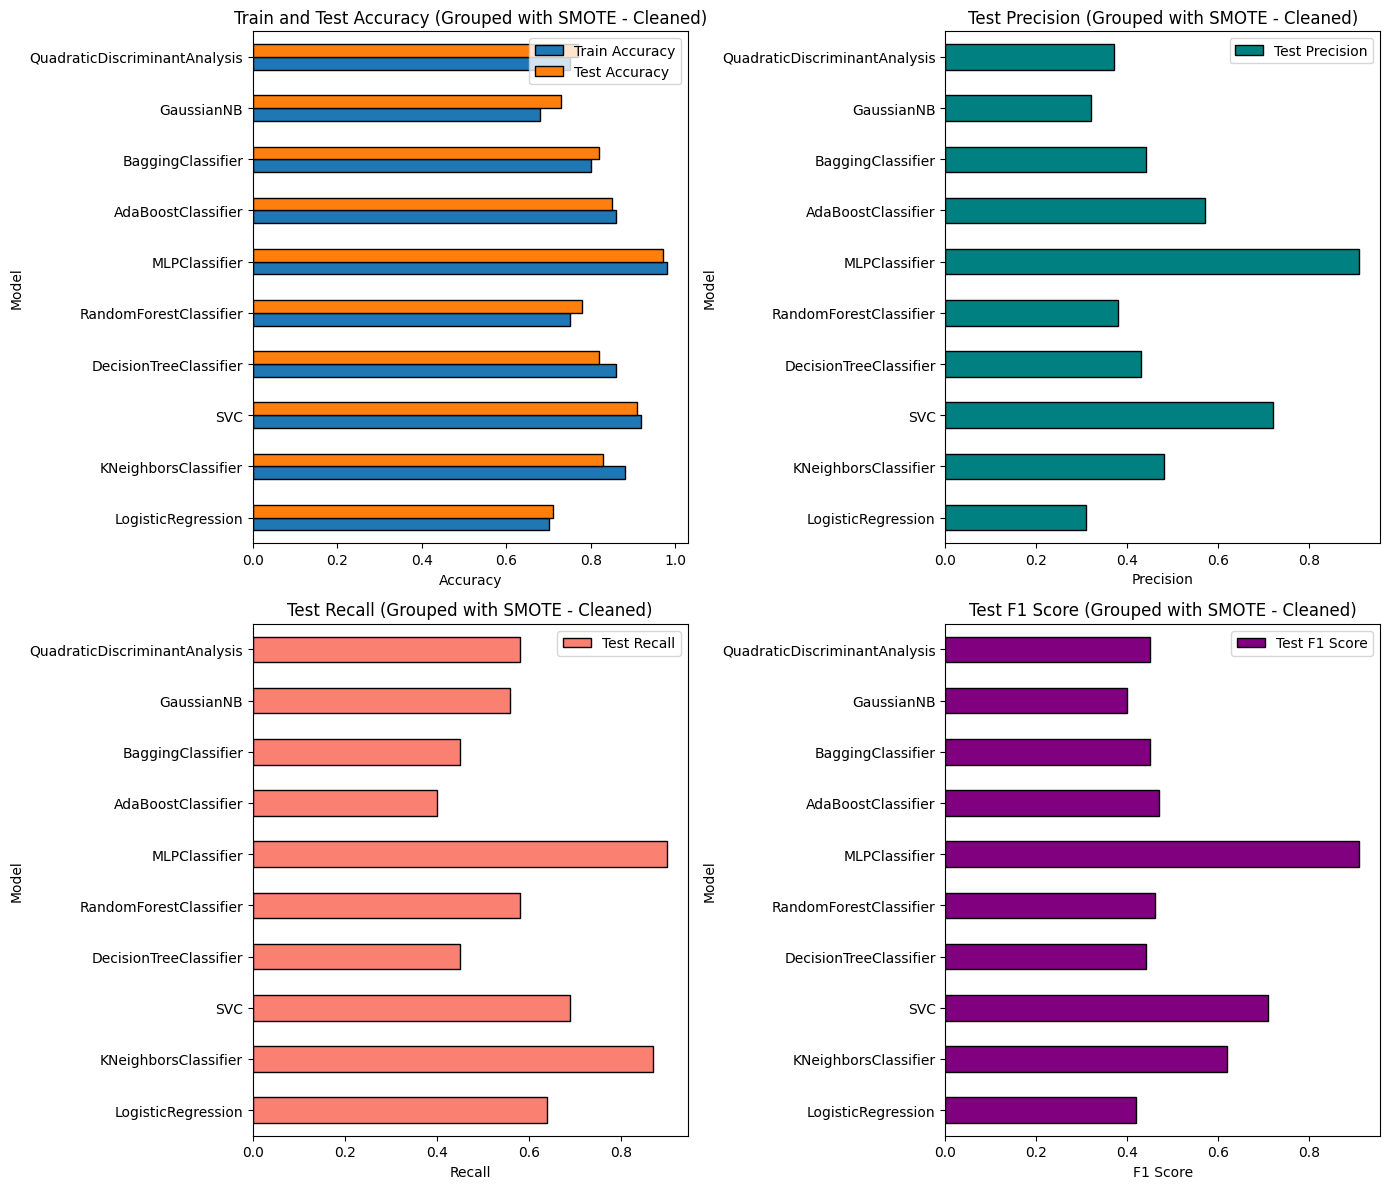

In [64]:
# Plotting the SMOTE results for the grouped dataset after cleaning
smote_results_grouped_cleaned_plot = smote_results_grouped_cleaned_df[[
    'Train Accuracy', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score'
]]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Train and Test Accuracy
smote_results_grouped_cleaned_plot[['Train Accuracy', 'Test Accuracy']].plot(
    kind='barh', ax=axs[0, 0], edgecolor='black'
)
axs[0, 0].set_title('Train and Test Accuracy (Grouped with SMOTE - Cleaned)')
axs[0, 0].set_xlabel('Accuracy')
axs[0, 0].set_ylabel('Model')

# Test Precision
smote_results_grouped_cleaned_plot[['Test Precision']].plot(
    kind='barh', ax=axs[0, 1], color='teal', edgecolor='black'
)
axs[0, 1].set_title('Test Precision (Grouped with SMOTE - Cleaned)')
axs[0, 1].set_xlabel('Precision')
axs[0, 1].set_ylabel('Model')

# Test Recall
smote_results_grouped_cleaned_plot[['Test Recall']].plot(
    kind='barh', ax=axs[1, 0], color='salmon', edgecolor='black'
)
axs[1, 0].set_title('Test Recall (Grouped with SMOTE - Cleaned)')
axs[1, 0].set_xlabel('Recall')
axs[1, 0].set_ylabel('Model')

# Test F1 Score
smote_results_grouped_cleaned_plot[['Test F1 Score']].plot(
    kind='barh', ax=axs[1, 1], color='purple', edgecolor='black'
)
axs[1, 1].set_title('Test F1 Score (Grouped with SMOTE - Cleaned)')
axs[1, 1].set_xlabel('F1 Score')
axs[1, 1].set_ylabel('Model')

# Show plot
plt.tight_layout()
plt.show()

### 4.5 - Evaluating results from HR Grouped Models

In [65]:
smote_results_grouped_df['Model Type'] = 'SMOTE Grouped'
smote_results_grouped_cleaned_df['Model Type'] = 'SMOTE Grouped Selected Features'

smote_results_grouped_df['Model Name'] = smote_results_grouped_df.index + " (SMOTE Grouped)"
smote_results_grouped_cleaned_df['Model Name'] = smote_results_grouped_cleaned_df.index + " (SMOTE Grouped Selected Features)"


In [66]:
# Combine SMOTE Grouped and SMOTE Grouped Cleaned Features results into a single DataFrame
smote_combined_grouped_results_df = pd.concat([smote_results_grouped_df, smote_results_grouped_cleaned_df], axis=0)

# Reorder columns for readability
smote_combined_grouped_results_df = smote_combined_grouped_results_df[[ 
    'Model Name', 'Model Type', 'Train Accuracy', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score'
]].reset_index(drop=True)

# Sort the results by Test F1 Score in descending order
top_10_smote_grouped_results = smote_combined_grouped_results_df.sort_values(by='Test F1 Score', ascending=False).head(10)

# Display the top 10 models
top_10_smote_grouped_results

,Model Name,Model Type,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1 Score
2,SVC (SMOTE Grouped),SMOTE Grouped,0.99,0.98,0.95,0.94,0.94
5,MLPClassifier (SMOTE Grouped),SMOTE Grouped,0.99,0.98,0.91,0.98,0.94
15,MLPClassifier (SMOTE Grouped Selected Features),SMOTE Grouped Selected Features,0.98,0.97,0.91,0.90,0.91
12,SVC (SMOTE Grouped Selected Features),SMOTE Grouped Selected Features,0.92,0.91,0.72,0.69,0.71
11,KNeighborsClassifier (SMOTE Grouped Selected F...,SMOTE Grouped Selected Features,0.88,0.83,0.48,0.87,0.62
9,QuadraticDiscriminantAnalysis (SMOTE Grouped),SMOTE Grouped,0.87,0.85,0.52,0.69,0.59
3,DecisionTreeClassifier (SMOTE Grouped),SMOTE Grouped,0.87,0.86,0.56,0.59,0.57
1,KNeighborsClassifier (SMOTE Grouped),SMOTE Grouped,0.84,0.75,0.39,0.97,0.56
6,AdaBoostClassifier (SMOTE Grouped),SMOTE Grouped,0.87,0.87,0.61,0.48,0.54
4,RandomForestClassifier (SMOTE Grouped),SMOTE Grouped,0.78,0.80,0.41,0.59,0.48


## 5.0 - Evaluating Best Overall Models

In [67]:
# Add a "Dataset" column to each DataFrame to distinguish between original and grouped features
smote_results_df['Dataset'] = 'Original'
smote_results_cleaned_df['Dataset'] = 'Original'
smote_results_grouped_df['Dataset'] = 'Grouped'
smote_results_grouped_cleaned_df['Dataset'] = 'Grouped'

# Add a "Model Type" column to each DataFrame to distinguish between SMOTE and SMOTE Selected Features
smote_results_df['Model Type'] = 'SMOTE'
smote_results_cleaned_df['Model Type'] = 'SMOTE Selected Features'
smote_results_grouped_df['Model Type'] = 'SMOTE'
smote_results_grouped_cleaned_df['Model Type'] = 'SMOTE Selected Features'

# Add a "Model Name" column to uniquely identify the classifier
smote_results_df['Model Name'] = smote_results_df.index
smote_results_cleaned_df['Model Name'] = smote_results_cleaned_df.index
smote_results_grouped_df['Model Name'] = smote_results_grouped_df.index
smote_results_grouped_cleaned_df['Model Name'] = smote_results_grouped_cleaned_df.index

# Combine all results
smote_combined_results_df = pd.concat([
    smote_results_df, smote_results_cleaned_df, 
    smote_results_grouped_df, smote_results_grouped_cleaned_df
], axis=0)

# Reorder columns for readability
smote_combined_results_df = smote_combined_results_df[[
    'Model Name', 'Model Type', 'Dataset', 'Train Accuracy', 'Test Accuracy', 
    'Test Precision', 'Test Recall', 'Test F1 Score'
]].reset_index(drop=True)

# Sort the results by Test F1 Score in descending order and select top 10 models
top_10_smote_combined_results = smote_combined_results_df.sort_values(
    by='Test F1 Score', ascending=False
).head(10)

# Display the top 10 models
top_10_smote_combined_results

,Model Name,Model Type,Dataset,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1 Score
5,MLPClassifier,SMOTE,Original,0.98,0.99,0.96,0.96,0.96
25,MLPClassifier,SMOTE,Grouped,0.99,0.98,0.91,0.98,0.94
22,SVC,SMOTE,Grouped,0.99,0.98,0.95,0.94,0.94
2,SVC,SMOTE,Original,0.98,0.97,0.88,0.94,0.91
35,MLPClassifier,SMOTE Selected Features,Grouped,0.98,0.97,0.91,0.90,0.91
15,MLPClassifier,SMOTE Selected Features,Original,0.98,0.97,0.91,0.90,0.90
32,SVC,SMOTE Selected Features,Grouped,0.92,0.91,0.72,0.69,0.71
12,SVC,SMOTE Selected Features,Original,0.93,0.87,0.58,0.81,0.67
31,KNeighborsClassifier,SMOTE Selected Features,Grouped,0.88,0.83,0.48,0.87,0.62
29,QuadraticDiscriminantAnalysis,SMOTE,Grouped,0.87,0.85,0.52,0.69,0.59


In the table above, I’ve listed our results sorted by Test-F1 score.

As mentioned before, I decided not to include any baseline models in the evaluation as they seemed unlikely to add significant value given the strong performance of the other models. While some of the models likely show signs of overfitting, I included them because of their high performance metrics and the fact that we still have other solid models to consider.

In the middle of the list, we see start to see models that perform well but are more likely to generalize better to unseen data. Although these models may not have the highest scores on this list, their balanced performance across training and testing indicates they might be more reliable when actually predicting employee attrition.

The SVC SMOTE Selected Features models for both the original and grouped datasets appear to be the best choices. Both models have good and balanced metrics, but the SVC Selected Features model on the grouped data stands out for its balance. While the 0.91 accuracy is high, it also offers balanced test precision (0.72) and recall (0.69), resulting in a solid F1 score of 0.71. This would likely be the model I choose in a real-world setting, though continuous monitoring of the model is extremely important for ensuring consistent performance.